# 📘 01_preprocessing.ipynb

# 🧠 Setup & Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Add custom scripts/ directory to the path
sys.path.append("scripts")

# Import from local DNA processing module
from encode_dna import (
    encode_kmer_batch, one_hot_encode, save_numpy_array,
    kmer_encoding
)

# 📂 Load Preprocessed Data

In [2]:
try:
    # Load sequences extracted from GenBank (.gb) files
    filtered = np.load("data/processed/X_filtered.npy", allow_pickle=True)
    print("✅ Using labeled gene sequences from GenBank:", len(filtered))
except FileNotFoundError:
    raise FileNotFoundError("❌ GenBank-labeled sequences not found. Run label_genbank_features.py first.")

✅ Using labeled gene sequences from GenBank: 823


# 🧪 K-mer Encoding

In [3]:
print("\n🧪 Performing k-mer encoding...")
X_kmer, kmer_vocab = encode_kmer_batch(filtered, k=3)
print(f"✅ K-mer encoded shape: {X_kmer.shape}")

# Save result
save_numpy_array(X_kmer, "data/processed/X_kmer.npy")


🧪 Performing k-mer encoding...
✅ K-mer encoded shape: (823, 64)


# 🔢 One-hot Encoding

In [4]:
# Calculate sequence lengths
sequence_lengths = [len(seq) for seq in filtered]
median_length = int(np.median(sequence_lengths))
print(f"ℹ️ Normalizing all sequences to median length: {median_length}")

# Pad or truncate to median length
uniform_sequences = [
    seq[:median_length] if len(seq) > median_length else seq.ljust(median_length, 'N')
    for seq in filtered
]

# One-hot encode to shape (N, L, 5)
X_onehot = one_hot_encode(uniform_sequences)
print(f"✅ One-hot encoded shape: {X_onehot.shape}")

# Save result
np.save("data/processed/X_onehot.npy", X_onehot)

ℹ️ Normalizing all sequences to median length: 360
✅ One-hot encoded shape: (823, 360, 5)


# 📊 Visualizations

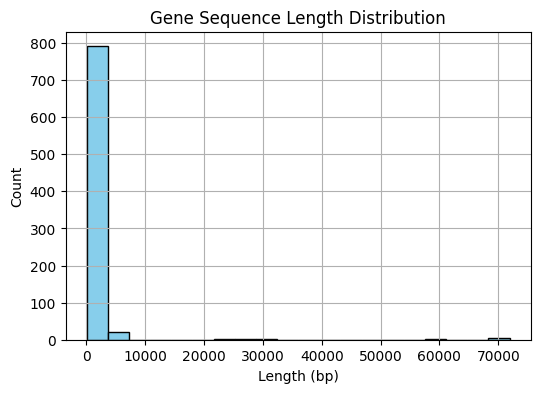

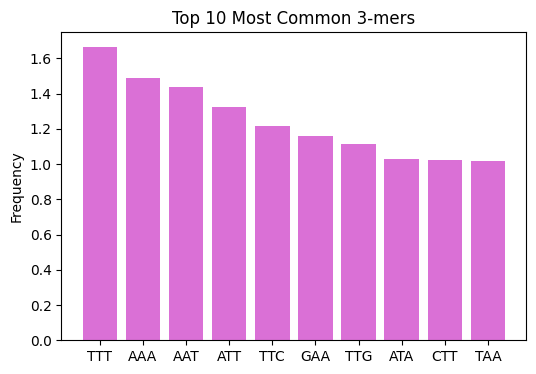

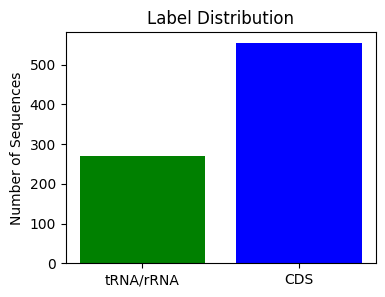

In [5]:
# 1. Sequence Length Distribution
plt.figure(figsize=(6,4))
plt.hist(sequence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Gene Sequence Length Distribution")
plt.xlabel("Length (bp)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 2. K-mer Frequency (Top 10)
merged = Counter()
for seq in filtered[:50]:  # Sample for speed
    merged.update(kmer_encoding(seq, k=3))

top_10 = merged.most_common(10)
labels, values = zip(*top_10)
plt.figure(figsize=(6,4))
plt.bar(labels, values, color='orchid')
plt.title("Top 10 Most Common 3-mers")
plt.ylabel("Frequency")
plt.show()

# 3. Label Distribution (CDS vs tRNA/rRNA)
try:
    y = np.load("data/processed/y_labels.npy")
    label_counts = Counter(y)
    plt.figure(figsize=(4,3))
    plt.bar(["tRNA/rRNA", "CDS"], [label_counts[0], label_counts[1]], color=["green", "blue"])
    plt.title("Label Distribution")
    plt.ylabel("Number of Sequences")
    plt.show()
except FileNotFoundError:
    print("ℹ️ Label file not found. Skipping label distribution plot.")

# ✅ Done

In [6]:
print("🎉 Preprocessing complete. Encoded data saved.")

🎉 Preprocessing complete. Encoded data saved.
